<a href="https://colab.research.google.com/github/CharlyPierce/SVM/blob/main/SVM_class_face_167.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces=fetch_lfw_people(min_faces_per_person=100)

In [ ]:
faces.images.shape

(1140, 62, 47)

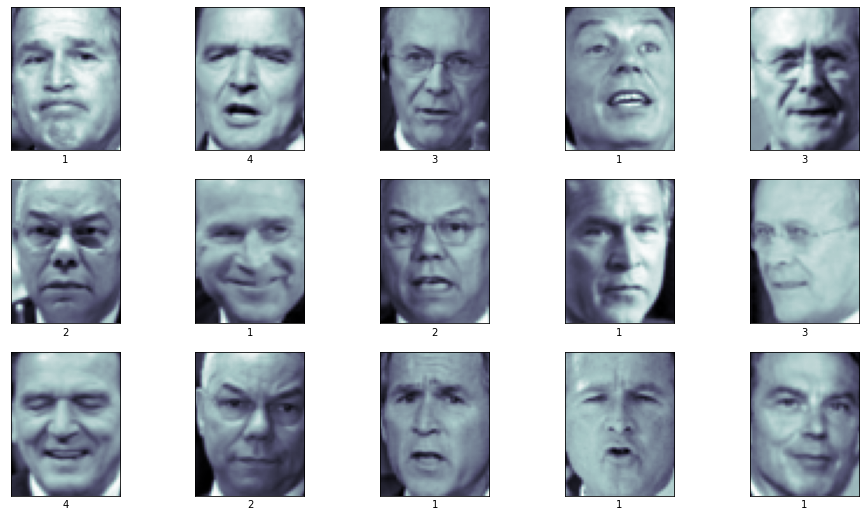

In [ ]:
fig,ax=plt.subplots(3,5,figsize=(16,9))
for i,ax in enumerate(ax.flat):
  ax.imshow(faces.images[i],cmap='bone')
  ax.set(xticks=[],yticks=[],xlabel=faces.target[faces.target[i]])

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [ ]:
pca=PCA(n_components=150,whiten=True)
svc=SVC(kernel='rbf',class_weight='balanced',random_state=42)
model=make_pipeline(pca,svc)

In [ ]:
from sklearn.model_selection import train_test_split
x_t,x_te,y_t,y_te=train_test_split(faces.data,faces.target,random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
param={
    'svc__C':[5,50,200,75,250],
    'svc__gamma':[0.001,0.008,0.007,0.005,0.006]
}
grid=GridSearchCV(model,param)
%time grid.fit(x_t,y_t)

CPU times: user 1min 25s, sys: 25.1 s, total: 1min 50s
Wall time: 1min 2s


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=150, random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=True)),
                                       ('svc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200,
                                            class_weight='balanced', coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False, random_state=42,
                            

In [ ]:
model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'pca', 'svc', 'pca__copy', 'pca__iterated_power', 'pca__n_components', 'pca__random_state', 'pca__svd_solver', 'pca__tol', 'pca__whiten', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose'])

In [ ]:
grid.best_params_

{'svc__C': 5, 'svc__gamma': 0.005}

In [ ]:
classifier=grid.best_estimator_
y_pred=classifier.predict(x_te)

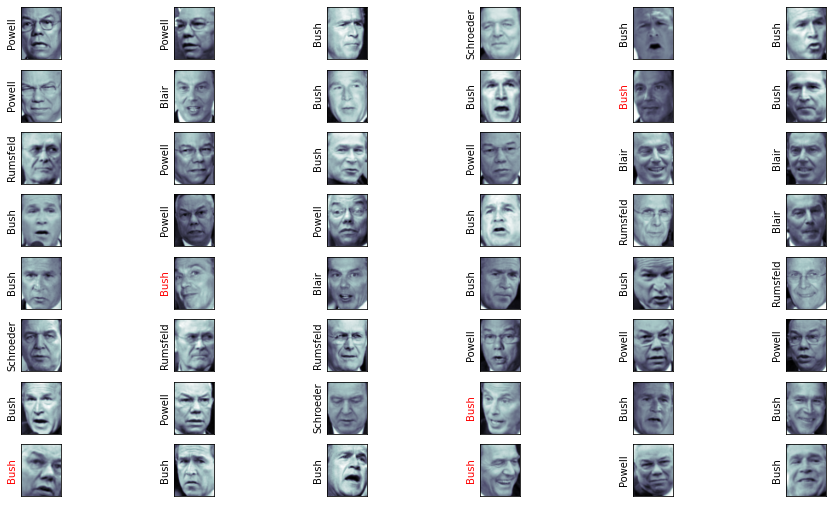

In [ ]:
fig,ax=plt.subplots(8,6,figsize=(16,9))
for i,ax_ in enumerate(ax.flat):
  ax_.imshow(x_te[i].reshape(62,47),cmap='bone')
  ax_.set(xticks=[],yticks=[])
  ax_.set_ylabel(faces.target_names[y_pred[i]].split()[-1],
                 color='black' if y_pred[i]==y_te[i] else 'red')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_te,y_pred,target_names=faces.target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.92      0.94      0.93        64
  Donald Rumsfeld       0.96      0.81      0.88        32
    George W Bush       0.89      0.98      0.94       127
Gerhard Schroeder       0.96      0.83      0.89        29
       Tony Blair       0.96      0.82      0.89        33

         accuracy                           0.92       285
        macro avg       0.94      0.88      0.90       285
     weighted avg       0.92      0.92      0.92       285



In [ ]:
#recall=sencibilidad:1- falsos negativos
#precision:especificidad cuantas veces acierta
#sopport No de individuos
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_te,y_pred)
mat

array([[ 60,   0,   4,   0,   0],
       [  1,  26,   3,   1,   1],
       [  2,   0, 125,   0,   0],
       [  2,   0,   3,  24,   0],
       [  0,   1,   5,   0,  27]])

In [ ]:
import seaborn as sns;sns.set()

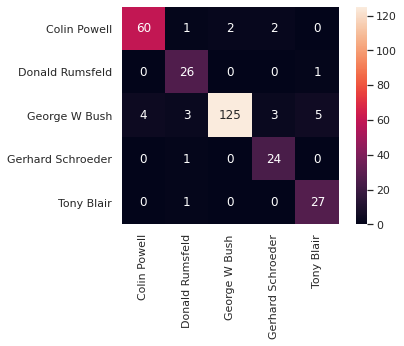

In [ ]:
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=True,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)